In [2]:
import nibabel as nib
from nipype.interfaces.fsl import BET
skullstrip = BET()

181109-03:05:31,85 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [6]:
errors =[]
for i in os.listdir('PPMI'):
    
    int_dir = os.listdir('PPMI/' +i)
    for a in int_dir:
        b = os.listdir('PPMI/' + i + '/' + a)
        c = os.listdir('PPMI/' + i + '/' + a + '/' + b[0])
        d = os.listdir('PPMI/' + i + '/' + a + '/' + b[0] + '/' + c[0])
        for p in d:
#             print('PPMI/' +i +'/' +a+'/' + b[0]+'/' + c[0] + '/' +p)
            inpath = 'PPMI/' +i +'/' +a+'/' + b[0]+'/' + c[0] + '/' +p
            outpath = 'PD_IMG/'+p
#             print(inpath)
            try :
                skullstrip.inputs.in_file = inpath
                skullstrip.inputs.out_file = outpath
                res = skullstrip.run()
            except:
                errors.append(inpath)
                print(errors)
                


181103-22:38:42,271 nipype.interface INFO:
	 stderr 2018-11-03T22:38:42.271251:Image Exception : #22 :: Failed to read volume PPMI/3332/Axial_PD-T2_TSE_FS/2013-04-23_12_43_50.0/S193623/PPMI_3332_MR_Axial_PD-T2_TSE_FS_br_raw_20130628092441578_87_S193623_I378538
181103-22:38:42,277 nipype.interface INFO:
	 stderr 2018-11-03T22:38:42.277196:Error : Error: short read, file may be truncated
181103-22:38:42,283 nipype.interface INFO:
	 stderr 2018-11-03T22:38:42.283310:terminate called after throwing an instance of 'armawrap::AWException'
181103-22:38:42,309 nipype.interface INFO:
	 stderr 2018-11-03T22:38:42.309246:  what():  Failed to read volume PPMI/3332/Axial_PD-T2_TSE_FS/2013-04-23_12_43_50.0/S193623/PPMI_3332_MR_Axial_PD-T2_TSE_FS_br_raw_20130628092441578_87_S193623_I378538
181103-22:38:42,309 nipype.interface INFO:
	 stderr 2018-11-03T22:38:42.309246:Error : Error: short read, file may be truncated
181103-22:38:43,20 nipype.interface INFO:
	 stderr 2018-11-03T22:38:43.020862:Aborted 

In [58]:
img = nib.load('PPMI/3125/MPRAGE_GRAPPA/2012-07-11_09_15_26.0/S169329/PPMI_3125_MR_MPRAGE_GRAPPA__br_raw_20121002083440452_66_S169329_I337681.nii')
img

In [59]:
try :
    data = img.get_fdata()
except:
    print('error in 3125')
    pass

error in 3125


In [23]:
data[:,:,1,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
skullstrip.inputs.in_file = "PPMI/3666/SAG_T1_3DMPRAGE/2013-03-14_13_27_56.0/S187844/PPMI_3666_MR_SAG_T1_3DMPRAGE__br_raw_20130424113847828_87_S187844_I368592.nii"
skullstrip.inputs.out_file = "Test1.nii.gz"
res = skullstrip.run()

In [33]:
data.shape

(512, 512, 28, 1)

In [18]:
x =[]

for image in os.listdir('PD_IMG'):
    skdata = nib.load('PD_IMG/'+image).get_fdata()
    if(skdata.shape[0] < 50 or skdata.shape[1] < 50):
        print(image,skdata.shape)


PPMI_4055_MR_t2_cor_br_raw_20130116154841043_2_S180360_I355347.nii.gz (256, 30, 256)
PPMI_4056_MR_t2_cor_br_raw_20130116155401544_21_S180362_I355349.nii.gz (256, 34, 256)


In [12]:
X[9].shape

(228, 256, 54)

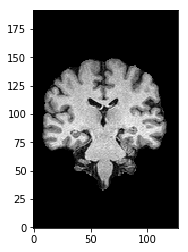

In [52]:
plt.imshow(skdata[:,80,:].T, cmap="gray", origin="lower")

In [7]:
from nipype.interfaces import fsl
flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
flt.inputs.in_file = 'PD_IMG/PPMI_3119_MR_Axial_PD-T2_TSE_FS_br_raw_20130724151737095_80_S196284_I382279.nii.gz'
flt.inputs.reference = 'fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'
flt.inputs.out_file = 'test123.nii.gz'
res = flt.run()

In [11]:
paths =[]
errors =[]
for i in os.listdir('PPMI'):
    
    int_dir = os.listdir('PPMI/' +i)
    for a in int_dir:
        int_dir1 = os.listdir('PPMI/' + i + '/' + a)
        for b in int_dir1:
            int_dir2 = os.listdir('PPMI/' + i + '/' + a + '/' + b)
            
            for c in int_dir2:  
                int_dir3 = os.listdir('PPMI/' + i + '/' + a + '/' + b + '/' + c)
                
                for p in int_dir3:
        #             print('PPMI/' +i +'/' +a+'/' + b[0]+'/' + c[0] + '/' +p)
                    inpath = 'PPMI/' +i +'/' +a+'/' + b+'/' + c + '/' +p
                    paths.append(inpath)
#                     outpath = 'PD_IMG/'+p
#         #             print(inpath)
#                     try :
#                         skullstrip.inputs.in_file = inpath
#                         skullstrip.inputs.out_file = outpath
#                         res = skullstrip.run()
#                     except:
#                         errors.append(inpath)
#                         print(errors)

In [15]:
paths

['PPMI/4073/AXIAL_FSE_T2_FS/2012-09-19_14_15_59.0/S190717/PPMI_4073_MR_AXIAL_FSE_T2_FS__br_raw_20130528154401597_34_S190717_I374132.nii',
 'PPMI/4073/AXIAL_FSE_T2_FS/2012-09-19_14_15_59.0/S190717/PPMI_4073_MR_AXIAL_FSE_T2_FS__br_raw_20130528154404405_21_S190717_I374134.nii',
 'PPMI/4073/SAG_3D_SPGR/2012-09-19_14_15_59.0/S190714/PPMI_4073_MR_SAG_3D_SPGR__br_raw_20130528154351145_97_S190714_I374129.nii',
 'PPMI/4073/AXIAL_FLAIR/2012-09-19_14_15_59.0/S190712/PPMI_4073_MR_AXIAL_FLAIR__br_raw_20130528154412876_20_S190712_I374127.nii',
 'PPMI/4101/t2_weighted_double_echo/2012-11-29_18_43_01.0/S180424/PPMI_4101_MR_t2_weighted_double_echo__br_raw_20130117094743318_41_S180424_I355424.nii',
 'PPMI/4101/t2_weighted_double_echo/2012-11-29_18_43_01.0/S180424/PPMI_4101_MR_t2_weighted_double_echo__br_raw_20130117094741025_8_S180424_I355423.nii',
 'PPMI/4101/ax_flair/2012-11-29_18_43_01.0/S180425/PPMI_4101_MR_ax_flair_br_raw_20130117094750308_23_S180425_I355425.nii',
 'PPMI/4101/sag_mprage/2012-11-29_

In [19]:

# for filename in glob.iglob('PPMI/**/*.nii', recursive=True):
#     print(filename)
a = glob.glob('PPMI/**/*.nii', recursive=True)

'PPMI/4073/AXIAL_FSE_T2_FS/2012-09-19_14_15_59.0/S190717/PPMI_4073_MR_AXIAL_FSE_T2_FS__br_raw_20130528154401597_34_S190717_I374132.nii'